Accuracy Score: 0.69 

Classification Report:

               precision    recall  f1-score   support

       blues       0.64      0.70      0.67        20
   classical       0.89      0.85      0.87        20
     country       0.67      0.50      0.57        20
       disco       0.65      0.55      0.59        20
      hiphop       0.62      0.65      0.63        20
        jazz       0.77      0.85      0.81        20
       metal       0.77      0.85      0.81        20
         pop       0.80      0.80      0.80        20
      reggae       0.59      0.50      0.54        20
        rock       0.52      0.65      0.58        20

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



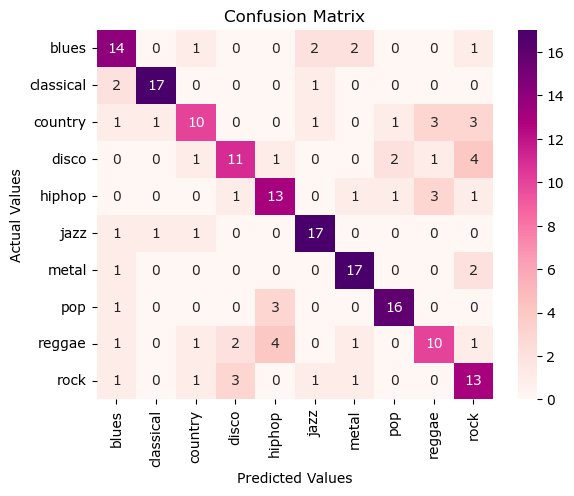

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   
import warnings
warnings.filterwarnings('ignore')  


## Loading features from text file into a Pandas dataframe
features = pd.read_csv('features.txt', delimiter='\t')

X = features.drop(['Genre'], axis=1)
y = features['Genre'] 

le = LabelEncoder() # Label Encoding is more suitable for ordered data
y_encoded=le.fit_transform(y) # Groups every song and its features with a numerical label based on genre

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1, stratify=y_encoded) 
# stratify ensures all genres are trained and tested

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Prevents data leakage by not extracting any features from test data

## Model Training using Logisitic Regression
t_mod = LogisticRegression(random_state=1, max_iter=1000).fit(X_train_scaled, y_train)
y_pred = t_mod.predict(X_test_scaled)

## Accuracy Testing
print("Accuracy Score:", accuracy_score(y_test, y_pred), "\n")
print("Classification Report:\n\n",classification_report(y_test, y_pred, target_names=le.classes_))

## Visualisation of Results
c_mat = confusion_matrix(y_test, y_pred)
hm = sns.heatmap(data=c_mat, annot=True, fmt='d',cmap="RdPu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


## Observations
# The accuracy score is 69% and within the expected range of 50-70% for GTZAN Music Dataset predicted using Logisitic Regression
# The overall prediction is 6.9x above random chance of 10% 
# The diagonal line of the confusion matrix shows each genre with 10 or more correct predicitions
# Classical, Jazz and Metal have the highest number of correct predictions
# Country and Reggae have the lowest number of correct predictions due to their mixed origins
# Hiphop gets confused with Reggae and Pop as expected
# Disco gets confused with Rock as expected
# Reggae gets confused with Country as expected
# Rock gets confused with Disco and Country as expected


